In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

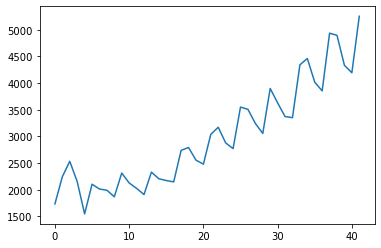

In [2]:
cococola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cococola.Sales.plot()

In [3]:
cococola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

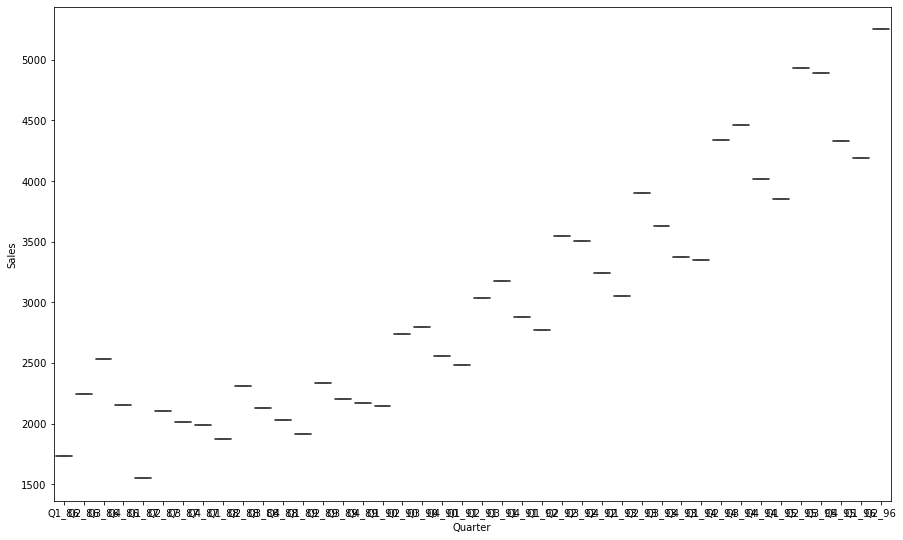

In [4]:
plt.figure(figsize=(15,20))
plt.subplot(211)
sns.boxplot(x="Quarter",y="Sales",data=cococola)

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

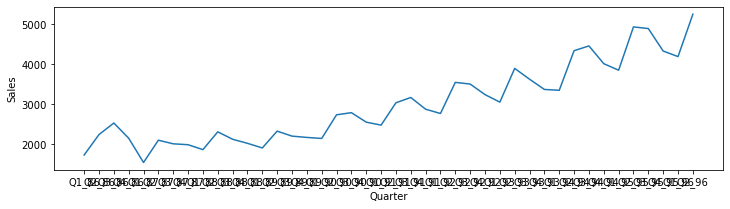

In [5]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Quarter",y="Sales",data=cococola)

In [6]:
quarter=['Q1','Q2','Q3','Q4']
n=cococola['Quarter'][0]
n[0:2]

cococola['quarter']=0

for i in range(42):
    n=cococola['Quarter'][i]
    cococola['quarter'][i]=n[0:2]
    
dummy=pd.DataFrame(pd.get_dummies(cococola['quarter']))

coco=pd.concat((cococola,dummy),axis=1)
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']
log_Sales=np.log(coco['Sales'])
coco['log_Sales']=log_Sales

<ipython-input-6-1b2100b45fa1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cococola['quarter'][i]=n[0:2]
C:\Users\SmartLine\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [7]:
cococola.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


<AxesSubplot:>

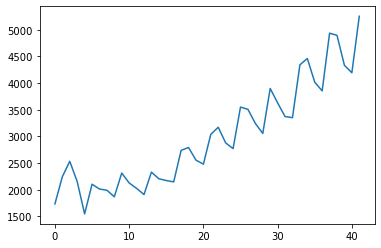

In [8]:
train= coco.head(38)
test=coco.tail(4)
coco.Sales.plot()

In [37]:
import statsmodels.formula.api as smf

#linear model
linear= smf.ols('Sales~t',data=train).fit()
pred_lin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmse_lin=np.sqrt((np.mean(np.array(test['Sales'])-np.array(pred_lin))**2))
rmse_lin

421.17878760022813

In [38]:
#quadratic model
quad=smf.ols('Sales~t+t_square',data=train).fit()
pred_quad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmse_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad

475.56183518315095

In [39]:
#exponential model
expo=smf.ols('log_Sales~t',data=train).fit()
pred_exp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
pred_exp
rmse_expo=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_expo

466.24797310672346

In [41]:
#additive seasonality
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
pred_add=pd.Series(additive.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
pred_add
rmse_add=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add))**2))
rmse_add

1860.0238154547283

In [42]:
#additive seasonality with linear trend
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_linear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
pred_add_linear

38    4292.265126
39    4066.761792
40    3961.769195
41    4639.214094
dtype: float64

In [43]:
rmse_add_linear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_linear))**2))
rmse_add_linear

464.98290239822427

In [44]:
#additive seasonality with quadratic trend
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_quad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmse_add_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_quad))**2))
rmse_add_quad

301.73800719352977

In [45]:
#multiplicative seasonality
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_mul= pd.Series(mulsea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmse_mul= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul)))**2))
rmse_mul

1963.3896400779709

In [46]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
pred_mullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmse_mulin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mullin)))**2))
rmse_mulin

225.5243904982721

In [47]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

581.8457187971785

In [48]:
#tabulating the rmse values

data={'Model':pd.Series(['rmse_mul_quad','rmse_add','rmse_add_linear','rmse_add_quad','rmse_expo','rmse_lin','rmse_mul','rmse_mulin','rmse_quad']),'Values':pd.Series([rmse_mul_quad,rmse_add,rmse_add_linear,rmse_add_quad,rmse_expo,rmse_lin,rmse_mul,rmse_mulin,rmse_quad])}
data

{'Model': 0      rmse_mul_quad
 1           rmse_add
 2    rmse_add_linear
 3      rmse_add_quad
 4          rmse_expo
 5           rmse_lin
 6           rmse_mul
 7         rmse_mulin
 8          rmse_quad
 dtype: object,
 'Values': 0     581.845719
 1    1860.023815
 2     464.982902
 3     301.738007
 4     466.247973
 5     421.178788
 6    1963.389640
 7     225.524390
 8     475.561835
 dtype: float64}

In [49]:
Rmse=pd.DataFrame(data)
Rmse

,Model,Values
0,rmse_mul_quad,581.845719
1,rmse_add,1860.023815
2,rmse_add_linear,464.982902
3,rmse_add_quad,301.738007
4,rmse_expo,466.247973
5,rmse_lin,421.178788
6,rmse_mul,1963.389640
7,rmse_mulin,225.524390
8,rmse_quad,475.561835
